In [1]:
!pip install joblib

In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Prepare the data

In [5]:
import pandas as pd

# Read the dataset from CSV file
df = pd.read_csv("student_performance_dataset.csv")

# Show the first 5 records to understand the data
print("\n=== Preview of Dataset (First 5 Rows) ===")
display(df.head())

# Basic information about the dataset
print("\n=== Dataset Information ===")
df.info()

# Check total number of rows and columns
print("\n=== Dataset Shape (rows, columns) ===")
print(df.shape)


=== Preview of Dataset (First 5 Rows) ===


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass



=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB

=== Dataset Shape (rows, columns) ===
(708, 10)


In [6]:
# Preprocessing

In [7]:
# ========================== SECTION 2 — DATA PREPROCESSING ==========================

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if any exist
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")


# Check for missing values
null_count = df.isnull().sum()
print("\n=== Null Values in Each Column ===")
print(null_count)

if null_count.sum() == 0:
    print("\nNo null values detected.")
else:
    print("\nNull values detected.")

Number of duplicate rows: 208
Duplicate rows removed.

=== Null Values in Each Column ===
Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

No null values detected.


In [8]:
# Remove Student_ID because it is not useful for prediction
df.drop(columns=['Student_ID'], inplace=True)

In [9]:
# Convert Pass/Fail labels into numerical form
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_encoded = df.copy()

# Encode binary categorical variables using Label Encoding
binary_cols = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode Parental Education Level using One-Hot Encoding because it is multiclass
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy variable trap
parental_edu_encoded = ohe.fit_transform(df_encoded[['Parental_Education_Level']])
parental_edu_cols = ohe.get_feature_names_out(['Parental_Education_Level'])

df_parental_edu = pd.DataFrame(parental_edu_encoded, columns=parental_edu_cols, index=df_encoded.index)

# Remove the original education column and attach encoded columns
df_encoded.drop(columns=['Parental_Education_Level'], inplace=True)
df_encoded = pd.concat([df_encoded, df_parental_edu], axis=1)

print("=== Dataset After Encoding ===")
print(df_encoded.head())

=== Dataset After Encoding ===
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       1                    31        68.267841                86   
1       1                    16        78.222927                73   
2       0                    21        87.525096                74   
3       0                    27        92.076483                99   
4       0                    37        98.655517                63   

   Internet_Access_at_Home  Extracurricular_Activities  Final_Exam_Score  \
0                        1                           1                63   
1                        0                           0                50   
2                        1                           0                55   
3                        0                           0                65   
4                        0                           1                70   

   Pass_Fail  Parental_Education_Level_High School  \
0          1                         

In [11]:
import pandas as pd

# Create a copy for Chi-Square analysis
df_chi = df_encoded.copy()

# Convert numeric data into categories for Chi-Square testing
# Study Hours per Week
df_chi['Study_Hours_Bin'] = pd.cut(df_chi['Study_Hours_per_Week'], bins=3, labels=['Low', 'Medium', 'High'])

# Attendance Rate
df_chi['Attendance_Rate_Bin'] = pd.cut(df_chi['Attendance_Rate'], bins=3, labels=['Low', 'Medium', 'High'])

# Past Exam Scores
df_chi['Past_Exam_Scores_Bin'] = pd.cut(df_chi['Past_Exam_Scores'], bins=3, labels=['Low', 'Medium', 'High'])

# Final_Exam_Score_Bin
df_chi['Final_Exam_Score_Bin'] = pd.cut(df_chi['Final_Exam_Score'], bins=3, labels=['Low', 'Medium', 'High'])

print("=== Dataset after binning numeric columns ===")
df_chi[['Study_Hours_Bin','Attendance_Rate_Bin','Past_Exam_Scores_Bin','Final_Exam_Score_Bin']].head()

=== Dataset after binning numeric columns ===


,Study_Hours_Bin,Attendance_Rate_Bin,Past_Exam_Scores_Bin,Final_Exam_Score_Bin
0,High,Medium,High,Medium
1,Low,Medium,Medium,Low
2,Medium,High,Medium,Low
3,Medium,High,High,Medium
4,High,High,Low,High


In [12]:
# Show bin edges for each numeric column
study_bins = pd.cut(df_chi['Study_Hours_per_Week'], bins=3)
attendance_bins = pd.cut(df_chi['Attendance_Rate'], bins=3)
past_exam_bins = pd.cut(df_chi['Past_Exam_Scores'], bins=3)
final_exam_bins = pd.cut(df_chi['Final_Exam_Score'], bins=3)

print("Study Hours per Week bin edges:", study_bins.cat.categories)
print("Attendance Rate bin edges:", attendance_bins.cat.categories)
print("Past Exam Scores bin edges:", past_exam_bins.cat.categories)
print("Final Exam Score bin edges:", final_exam_bins.cat.categories)

Study Hours per Week bin edges: IntervalIndex([(9.971, 19.667], (19.667, 29.333], (29.333, 39.0]], dtype='interval[float64, right]')
Attendance Rate bin edges: IntervalIndex([(50.067, 66.734], (66.734, 83.351], (83.351, 99.968]], dtype='interval[float64, right]')
Past Exam Scores bin edges: IntervalIndex([(49.95, 66.667], (66.667, 83.333], (83.333, 100.0]], dtype='interval[float64, right]')
Final Exam Score bin edges: IntervalIndex([(49.973, 59.0], (59.0, 68.0], (68.0, 77.0]], dtype='interval[float64, right]')


In [13]:
from scipy.stats import chi2_contingency
# Function to perform Chi-Square test for each feature
def chi_square_test(feature, target="Pass_Fail"):
    # Build contingency table
    table = pd.crosstab(df_chi[target], df_chi[feature])

    print("\n--------------------------------------------")
    print(f" Chi-Square Analysis for: {feature}")
    print("--------------------------------------------")

    print("\n Contingency Table")
    print(table)

    # Run test
    chi2, p, dof, expected = chi2_contingency(table)

    print("\n Test Statistics")
    print(f"- Chi² Value     : {chi2:.4f}")
    print(f"- p-value        : {p:.4f}")
    print(f"- DOF            : {dof}")
    
    # Significance check
    alpha = 0.05
    status = "SIGNIFICANT" if p < alpha else "not significant"

    print("\n Interpretation")
    print(f"=> The association between **{feature}** and **{target}** is {status}.")
    print(f"(alpha = {alpha}, p = {p:.4f})")
    print("------------------------------------------------------------\n")


In [14]:
# List of all features to be tested
categorical_features = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities'] \
                     + list(ohe.get_feature_names_out(['Parental_Education_Level'])) \
                     + ['Study_Hours_Bin', 'Attendance_Rate_Bin', 'Past_Exam_Scores_Bin', 'Final_Exam_Score_Bin']

# Run Chi-Square test for each feature
for feature in categorical_features:
    chi_square_test(feature)


--------------------------------------------
 Chi-Square Analysis for: Gender
--------------------------------------------

 Contingency Table
Gender       0    1
Pass_Fail          
0          176  178
1           80   66

 Test Statistics
- Chi² Value     : 0.8729
- p-value        : 0.3502
- DOF            : 1

 Interpretation
=> The association between **Gender** and **Pass_Fail** is not significant.
(alpha = 0.05, p = 0.3502)
------------------------------------------------------------


--------------------------------------------
 Chi-Square Analysis for: Internet_Access_at_Home
--------------------------------------------

 Contingency Table
Internet_Access_at_Home    0    1
Pass_Fail                        
0                        181  173
1                         82   64

 Test Statistics
- Chi² Value     : 0.8586
- p-value        : 0.3541
- DOF            : 1

 Interpretation
=> The association between **Internet_Access_at_Home** and **Pass_Fail** is not significant.
(alph

In [15]:
# Columns to drop based that are irrelevant
columns_to_drop = [
    'Gender',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Final_Exam_Score',
    'Parental_Education_Level_High School',
    'Parental_Education_Level_PhD',
    'Parental_Education_Level_Masters',
    'Study_Hours_Bin',
    'Attendance_Rate_Bin',
    'Past_Exam_Scores_Bin',
    'Final_Exam_Score_Bin'
]

# Drop the columns
df_final = df_chi.drop(columns=columns_to_drop)

# Check updated dataset
print("=== Dataset ready for prediction ===")
print(df_final.head())
print(f"\nUpdated dataset shape: {df_final.shape}")


=== Dataset ready for prediction ===
   Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Pass_Fail
0                    31        68.267841                86          1
1                    16        78.222927                73          0
2                    21        87.525096                74          0
3                    27        92.076483                99          1
4                    37        98.655517                63          1

Updated dataset shape: (500, 4)


In [16]:
# Exploratory Data Analysis (EDA)

=== Summary Statistics ===


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Pass_Fail
count,500.000000,500.000000,500.000000,500.000000
mean,25.184000,75.830689,75.218000,0.292000
std,8.804384,13.969186,14.442841,0.455138
min,10.000000,50.116970,50.000000,0.000000
25%,18.000000,64.959340,62.000000,0.000000
50%,26.000000,76.752661,75.500000,0.000000
75%,33.000000,87.548861,88.000000,1.000000
max,39.000000,99.967675,100.000000,1.000000


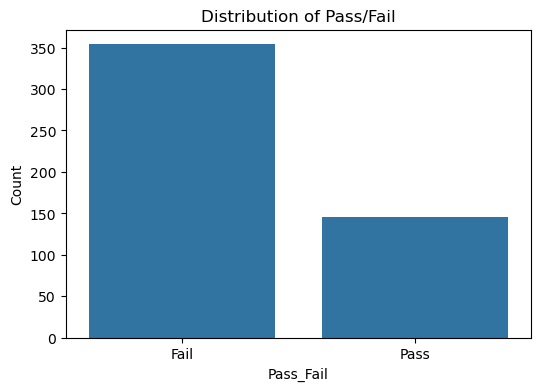

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistical summary
print("=== Summary Statistics ===")
display(df_final.describe())

# Visualize the distribution of Pass and Fail cases
plt.figure(figsize=(6,4))
sns.countplot(x='Pass_Fail', data=df_final)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass_Fail')
plt.ylabel('Count')
plt.xticks([0,1], ['Fail','Pass'])
plt.show()

Data has been split into training and testing sets.
Training data class distribution: Counter({0: 283, 1: 117})
Scaling completed.

Applying SMOTE...
New class distribution after SMOTE: Counter({1: 283, 0: 283})

Best parameters found: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

===== SVM Model Performance =====
Accuracy: 76.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81        71
           1       0.56      0.83      0.67        29

    accuracy                           0.76       100
   macro avg       0.74      0.78      0.74       100
weighted avg       0.81      0.76      0.77       100



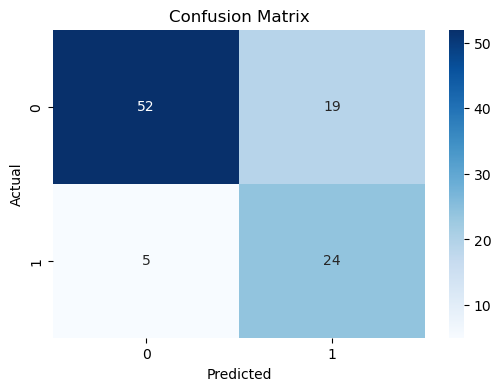

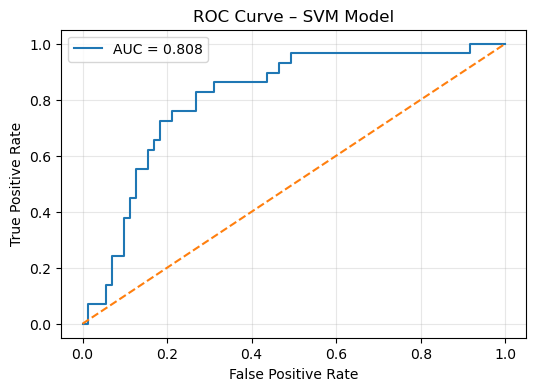

In [18]:
# ================================
#   SUPPORT VECTOR MACHINE (SVM)
# ================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE


# -----------------------------------------------------
# 1. Select Features & Target 
# -----------------------------------------------------
X = df_final.drop(columns=['Pass_Fail'])
y = df_final['Pass_Fail']

# -----------------------------------------------------
# 2. Split data into training and testing sets
# -----------------------------------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Data has been split into training and testing sets.")
print("Training data class distribution:", Counter(y_train))



# -----------------------------------------------------
# 3. Feature scaling using StandardScaler
# -----------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

print("Scaling completed.")

# -----------------------------------------------------
# 4. Handle class imbalance using SMOTE
# -----------------------------------------------------
print("\nApplying SMOTE...")

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("New class distribution after SMOTE:", Counter(y_train_res))

# -----------------------------------------------------
# 5. Train SVM model with hyperparameter tuning
# -----------------------------------------------------
param_grid = {
    'C': [0.5, 1, 5, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svm_model = SVC(probability=True)
#train
grid = GridSearchCV(
    svm_model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("\nBest parameters found:", grid.best_params_)
# extract the best trained model
best_svm = grid.best_estimator_

# -----------------------------------------------------
# 6. Test the trained model using test data
# -----------------------------------------------------
# TEST THE MODEL
y_pred = best_svm.predict(X_test_scaled)

print("\n===== SVM Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------------------------------
# 7. Confusion Matrix
# -----------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------
# 8. ROC Curve and AUC Score
# -----------------------------------------------------
y_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM Model")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Class distribution before SMOTE: Counter({0: 283, 1: 117})
Class distribution after SMOTE: Counter({1: 283, 0: 283})

Searching for optimal K...
Best K found: 18 with Accuracy: 0.7500


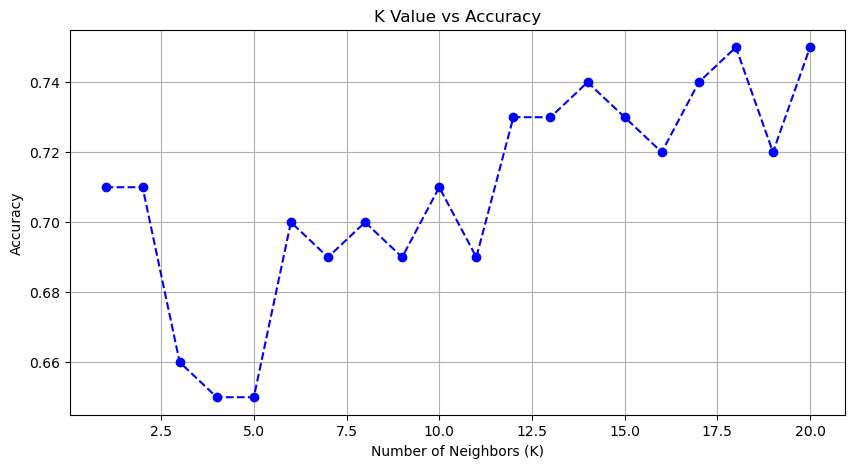


===== Custom KNN Performance (K=18) =====
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81        71
           1       0.55      0.79      0.65        29

    accuracy                           0.75       100
   macro avg       0.72      0.76      0.73       100
weighted avg       0.80      0.75      0.76       100



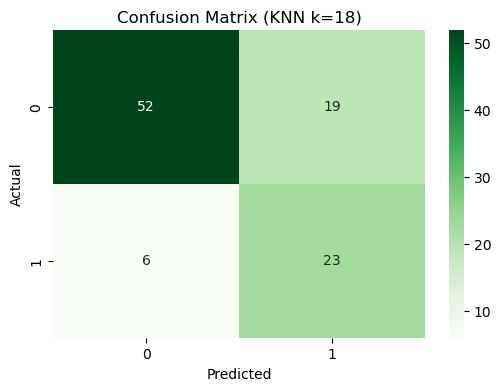

In [19]:
# ================================
#   K-Nearest Neighbour (KNN)
# ================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # Requires: pip install imbalanced-learn

# --------------------------------------------
#   Custom KNN Classifier)
# --------------------------------------------
class CustomKNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)
    
    def _predict_single(self, x):
        # Calculate Euclidean distance between x and all examples in the training set
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# ============================================
#   DATA PREPARATION
# ============================================

# 1. Define X and y
X = df_final.drop('Pass_Fail', axis=1)
y = df_final['Pass_Fail']

# 2. Split Data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale Features based on Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Apply same scale to test

# 4. Handle Imbalance with SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("Class distribution after SMOTE:", Counter(y_train_res))

# ============================================
#   HYPERPARAMETER TUNING (Finding Best K)
# ============================================

best_k = 1
best_acc = 0
accuracies = []
k_range = range(1, 21) # Test K from 1 to 20

print("\nSearching for optimal K...")

for k in k_range:
    temp_knn = CustomKNN(k=k)
    temp_knn.fit(X_train_res, y_train_res)
    temp_preds = temp_knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, temp_preds)
    accuracies.append(acc)
    
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"Best K found: {best_k} with Accuracy: {best_acc:.4f}")

# Plot K vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='blue')
plt.title('K Value vs Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# ============================================
#   FINAL MODEL & EVALUATION
# ============================================

# Train final model with the Best K found
final_knn = CustomKNN(k=best_k)
final_knn.fit(X_train_res, y_train_res)
y_pred = final_knn.predict(X_test_scaled)

print("\n===== Custom KNN Performance (K={}) =====".format(best_k))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visual Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title(f'Confusion Matrix (KNN k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training ANN on SMOTE-balanced data...
Epoch 1/100
15/15 - 3s - 174ms/step - accuracy: 0.5465 - loss: 0.6980 - val_accuracy: 0.0000e+00 - val_loss: 0.8451
Epoch 2/100
15/15 - 0s - 22ms/step - accuracy: 0.6106 - loss: 0.6662 - val_accuracy: 0.0000e+00 - val_loss: 0.8282
Epoch 3/100
15/15 - 0s - 13ms/step - accuracy: 0.6261 - loss: 0.6458 - val_accuracy: 0.0000e+00 - val_loss: 0.8152
Epoch 4/100
15/15 - 0s - 13ms/step - accuracy: 0.6327 - loss: 0.6085 - val_accuracy: 0.0351 - val_loss: 0.8075
Epoch 5/100
15/15 - 0s - 13ms/step - accuracy: 0.6858 - loss: 0.5905 - val_accuracy: 0.2544 - val_loss: 0.7940
Epoch 6/100
15/15 - 0s - 13ms/step - accuracy: 0.6858 - loss: 0.5614 - val_accuracy: 0.3421 - val_loss: 0.7808
Epoch 7/100
15/15 - 0s - 11ms/step - accuracy: 0.7124 - loss: 0.5445 - val_accuracy: 0.3509 - val_loss: 0.7824
Epoch 8/100
15/15 - 0s - 14ms/step - accuracy: 0.7190 - loss: 0.5276 - val_accuracy: 0.4825 - val_loss: 0.7644
Epoch 9/100
15/15 - 0s - 14ms/step - accuracy: 0.7301 - loss

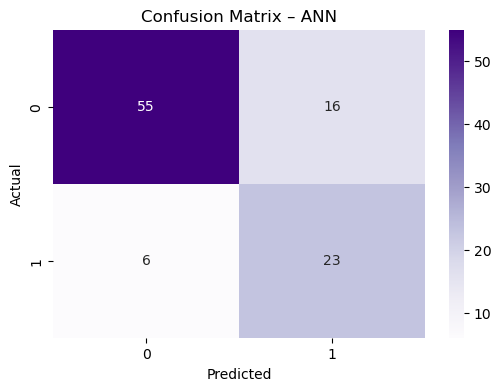

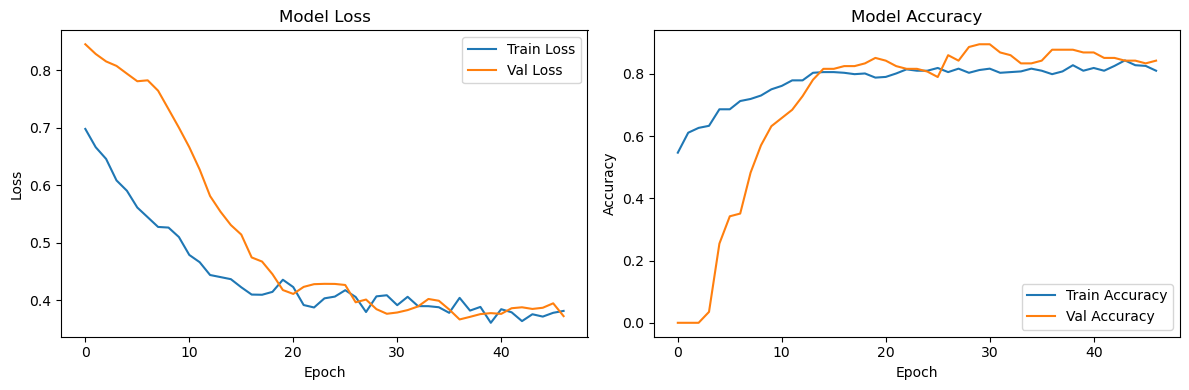

In [20]:
# ================================
#   Artificial Neural Network (ANN)
# ================================

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Build the ANN Architecture
model = Sequential([
    tf.keras.Input(shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 2. Compile the Model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 3. Define Early Stopping 
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

print("Training ANN on SMOTE-balanced data...")

# 4. Train the Model (verbose=2 shows only 1 line per epoch)
history = model.fit(
    X_train_res, 
    y_train_res, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stop],
    verbose=2
)

# 5. Model Evaluation on Test Set
print("\nEvaluating on Test Set...")
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# 6. Generate Predictions
y_pred_prob = model.predict(X_test_scaled, verbose=0)
y_pred_ann = (y_pred_prob > 0.5).astype("int32")

# 7. Classification Report & Confusion Matrix
print("\n===== ANN Classification Report =====")
print(classification_report(y_test, y_pred_ann))

print("\n===== Confusion Matrix =====")
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann, annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix – ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Plot Training History (Loss & Accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# ==========================================
#   SAVE MODELS AND SCALER (Joblib & Keras)
# ==========================================
import joblib

print("Saving models and scaler...")

# 1. Save the Scaler (Crucial for preprocessing new data)
joblib.dump(scaler, 'scaler.joblib')
print("- Scaler saved as 'scaler.joblib'")

# 2. Save the SVM Model (best_svm from GridSearch)
joblib.dump(best_svm, 'svm_model.joblib')
print("- SVM Model saved as 'svm_model.joblib'")

# 3. Save the Custom KNN Model
# Note: Since this is a custom class, the class definition must exist 
# in the script that loads this file later.
joblib.dump(final_knn, 'knn_model.joblib')
print("- KNN Model saved as 'knn_model.joblib'")

# 4. Save the ANN Model
# Keras models are best saved using their native .keras format
model.save('ann_model.keras')
print("- ANN Model saved as 'ann_model.keras'")

print("\nAll artifacts saved successfully!")

Saving models and scaler...
- Scaler saved as 'scaler.joblib'
- SVM Model saved as 'svm_model.joblib'
- KNN Model saved as 'knn_model.joblib'
- ANN Model saved as 'ann_model.keras'

All artifacts saved successfully!
